# Proyecto 2

## Métodos multipaso

En este proyecto se trata de estudiar los métodos multipaso para resolver problemas de valor inicial. Puede verse una introducción a estos métodos en los apuntes de la asignatura.

En un método de $k$ pasos (sidendo $k\in\mathbb N$ fijo) para calcular la sucesión en la etapa $n+k$ se utilizan los valores obtenidos en $k$ etapas anteriores (o sea, en las etapas $n$, $n+1$,..., $n+k-1$), además de la etapa $n+k$.

Antes de arrancar el método, sólo conocemos el valor de $y_0$. Por tanto, por tanto (para $n=0$), antes de calcular $y_k$, es necesario aproximar $y_1$, $y_2$, ..., $y_{k-1}$. Esto se suele hacer mediante un método de un paso adecuado (adecuado significa que tenga el mismo orden que el método multipaso que vayamos a utilizar).

En esta práctica se propone:

1. Elegir uno o varios problemas de valor inicial que se consideren interesantes (por ejemplo, extraídos de la bibliografía de esta u otras asignaturas, ecuaciones que provengan del ámbito de la Ciencia, etc.). 

2. Estudiar los métodos multipaso (al menos, a nivel de introducción, es decir, sin entrar en detalles).

3. Utilizar algún método multipaso para su resolución numérica. Comprobar que la solución obtenida se corresponde con la solución exacta o bien con la solución aproximada que proporciona Python.

### Ejemplo 1: el método de Adams-Bashforth de orden 2

Como modelo, se muestra un ejercicio en el que se usa esquema explícito de Adams-Bashforth de orden 2 (y de 2 pasos). Además de éste, otros esquemas interesantes (que se pueden usar en este proyecto, si) son:
- Esquemas explícitos de Adams-Bashfort de mayor orden, por ejemplo de orden 4 (y 4 pasos).
- Esquemas de tipo predictor-corrector, de orden 2 (2 pasos), de orden 4 (4 pasos) etc.

Para conocer estos esquemas, consultar la bibliografía, los apuntes del año anterior o realizar una búsqueda en internet (o hablar con el profesor de la asignatura).

Aproximar la solución del problema de Cauchy

$$
y'=x^2 - \sqrt{y-e^{x/2}}, \quad x\in[0,2], \quad
y(0)=5,
$$
con paso $h=0.1$, mediante el método de Adams--Bashforth de orden dos (que es un método de dos pasos), descrito a continuación:
> $$
y_{n+2}=y_{n+1} + \frac{h}{2} \big[3f(t_{n+1},y_{n+1}) - f(t_{n},y_{n}) \big].
$$

Para arrancar el método, es necesario aproximar $y_1$. Utilizar un método de un paso adecuado (es decir, un método de un paso que tenga orden $2$).

#### Resolución del ejercicio anterior

In [11]:
%pylab inline


def AB2(f, y_a, a, b, N):
    """Calcula la solución de y'=f(t,y) mediante el mét. AB2."""
    h = float(b-a)/N
    t = linspace(a, b, N+1)
    
    # (1) Inicialización, por ejemplo mediante Euler-Cauchy (que tiene orden 2)
    sol = [y_a] # Almacenamos y_0
    yn = y_a
    for i in range(1): # Sólo daremos un paso en E-Cauchy, calculando y_1
        tn = t[i]
        k1 = yn + h/2 * f(tn, yn)
        yn = yn + h*f(tn + h/2, k1) # E-Cauchy
        sol.append(yn)
        
    # (2) Iteraciones del método predictor-corrector AB2-AM2
    y0 = sol[0]; y1 = sol[1];
    f0 = f(a, y0); f1 = f(a+h, y1);
    for i in range(N-1): # i = 0, 1, ..., N-2
        # a) Cálculo de $y_{n+2}$
        yn = yn + h/2 * (3*f1 - f0)
        sol.append(yn)
        # b) Preparamos la siguiente iteración
        tn = t[i+2] # Ponemos el tiempo en $t_{n+2}$
        f0 = f1; # Mediante esta asignación, evitamos tener que volver a evaluar f
        f1 = f(tn, yn) # Calculamos f en $t_{n+2}$
    return sol


def f(t, y): return t**2 - sqrt(y-exp(t/2))
a, b = 0, 2
N = 20
y_a = 5

sol_ab2 = AB2(f, y_a, a, b, N)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


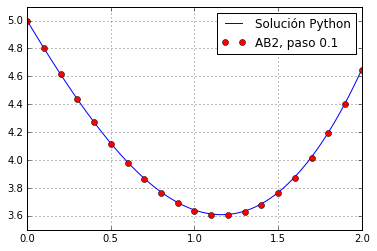

In [13]:
t = linspace(a, b, N+1)
tt = linspace(a,b,100)
from scipy.integrate import odeint
def func(y, t): return f(t,y)
sol_python = odeint(func, y_a, tt)
ylim(3.5,5.1)
plot(tt, sol_python, label=u'Solución Python')

plot(t, sol_ab2, 'o', c='red',  label='AB2, paso ' + str(h))
legend(loc='best')
grid()

### Ejemplo 2: El método de Adams-Bashforth de cuarto orden

$$y_{n+4} = y_{n+3} + h\left( \frac{55}{24} f(t_{n+3}, y_{n+3}) - \frac{59}{24} f(t_{n+2}, y_{n+2}) + \frac{37}{24} f(t_{n+1}, y_{n+1}) - \frac{3}{8} f(t_n, y_n) \right) $$



### Ejemplo 3: Un método predictor-corrector: Adams-Bashorth 2 + Adams-Moulton 2


\begin{align*}
y^P_{n+2}&=y_{n+1} + \frac{h}{2} \big( 3f(t_{n+1},y_{n+1}) - f(t_{n},y_{n}) \big) \quad (\text{cálculo de la predicción,  } y^P_{n+2}).\\
y_{n+2}&=y_{n+1} + \frac{h}{2} \big( f(t_{n+2},y^P_{n+2}) + f(t_{n+1},y_{n+1}) \big) \quad(\text{corrección para obtener  } y_{n+2}).
\end{align*}